# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

In [1]:
from utils.dataloaders import get_mnist_dataloaders
train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

### Define latent distribution of the model

In [2]:
# Latent distribution will be joint distribution of 10 gaussian normal distributions
# and one 10 dimensional Gumbel Softmax distribution
latent_spec = {'cont': 10,
               'disc': [10]}

### Build a model

In [3]:
from jointvae.models import VAE

model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32))

In [4]:
print(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=10, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=10, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=20, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv

### Train the model

In [5]:
from torch import optim

# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-4)

In [6]:
from jointvae.training import Trainer

# Define the capacities
# Continuous channels
cont_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0

# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity)

In [9]:
# Build a visualizer which will be passed to trainer to visualize progress during training
from viz.visualize import Visualizer

viz = Visualizer(model)

In [25]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo

trainer.train(train_loader, epochs=20, save_training_gif=('./training.gif', viz))

0/60000	Loss: 205.057
3200/60000	Loss: 194.138
6400/60000	Loss: 196.653
9600/60000	Loss: 195.896
12800/60000	Loss: 197.448
16000/60000	Loss: 196.562
19200/60000	Loss: 195.491
22400/60000	Loss: 193.369
25600/60000	Loss: 193.970
28800/60000	Loss: 193.973
32000/60000	Loss: 196.372
35200/60000	Loss: 194.941
38400/60000	Loss: 196.363
41600/60000	Loss: 195.410
44800/60000	Loss: 195.433
48000/60000	Loss: 194.503
51200/60000	Loss: 196.050
54400/60000	Loss: 193.171
57600/60000	Loss: 195.294
Epoch: 1 Average loss: 195.37
0/60000	Loss: 186.432
3200/60000	Loss: 192.881
6400/60000	Loss: 195.433
9600/60000	Loss: 194.911
12800/60000	Loss: 195.053
16000/60000	Loss: 196.746
19200/60000	Loss: 193.605
22400/60000	Loss: 193.668
25600/60000	Loss: 194.154
28800/60000	Loss: 194.236
32000/60000	Loss: 194.806
35200/60000	Loss: 192.769
38400/60000	Loss: 195.026
41600/60000	Loss: 195.517
44800/60000	Loss: 195.409
48000/60000	Loss: 196.040
51200/60000	Loss: 196.178
54400/60000	Loss: 193.611
57600/60000	Loss: 194.

51200/60000	Loss: 172.094
54400/60000	Loss: 172.247
57600/60000	Loss: 172.024
Epoch: 16 Average loss: 173.41
0/60000	Loss: 158.090
3200/60000	Loss: 171.372
6400/60000	Loss: 173.632
9600/60000	Loss: 172.063
12800/60000	Loss: 172.245
16000/60000	Loss: 173.357
19200/60000	Loss: 172.740
22400/60000	Loss: 172.371
25600/60000	Loss: 172.480
28800/60000	Loss: 172.434
32000/60000	Loss: 174.460
35200/60000	Loss: 175.819
38400/60000	Loss: 175.325
41600/60000	Loss: 170.738
44800/60000	Loss: 171.558
48000/60000	Loss: 171.051
51200/60000	Loss: 171.546
54400/60000	Loss: 171.501
57600/60000	Loss: 171.293
Epoch: 17 Average loss: 172.55
0/60000	Loss: 180.342
3200/60000	Loss: 170.841
6400/60000	Loss: 173.926
9600/60000	Loss: 172.998
12800/60000	Loss: 170.826
16000/60000	Loss: 172.029
19200/60000	Loss: 172.548
22400/60000	Loss: 172.715
25600/60000	Loss: 170.371
28800/60000	Loss: 173.387
32000/60000	Loss: 170.589
35200/60000	Loss: 174.176
38400/60000	Loss: 171.628
41600/60000	Loss: 171.671
44800/60000	Loss

### Visualize

In [12]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt

# Get a batch of data
for batch, labels in test_loader:
    break

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

plt.imshow(recon.numpy()[0, :, :], cmap='gray')

TypeError: slice indices must be integers or None or have an __index__ method

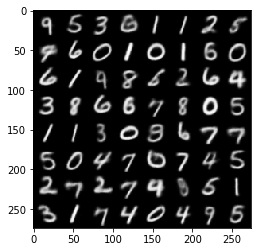

In [26]:
# Plot samples
samples = viz.samples()
plt.imshow(samples.numpy()[0, :, :], cmap='gray')

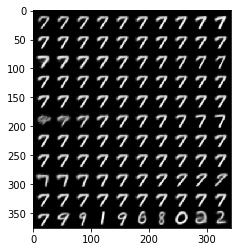

In [27]:
# Plot all traversals
traversals = viz.all_latent_traversals(size=10)
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

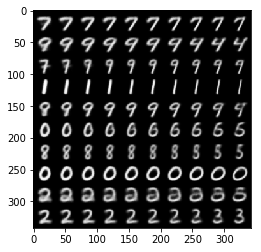

In [28]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=2, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

In [29]:
# Plot a grid of some traversals
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import torch
path_to_data='../data'
all_transforms = transforms.Compose([
        transforms.Resize(32),
        transforms.ToTensor()
    ])
test_data = datasets.MNIST(path_to_data, train=False,
                               transform=all_transforms)
test_loader = DataLoader(test_data, batch_size=10000, shuffle=True)
for data in test_loader:
    pass
imges = data[0]
label = data[1]

In [30]:
latent_dist = model.encode(imges)
_, predict_label = torch.max(latent_dist['disc'][0], dim=1)
confusion = torch.zeros(10, 10)
for i in range(10000):
    confusion[label[i].item(),predict_label[i].item()] += 1
for i in range(10):
    confusion[i] = confusion[i] / confusion[i].sum()

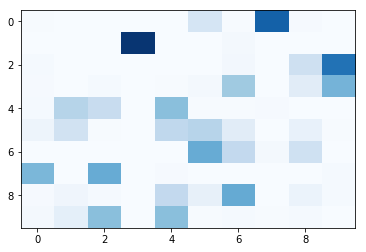

In [31]:
# confusion = np.array([[0.9,0.1,0.0],[0.0,0.8,0.2],[0.1,0.7,0.2]])
# confusion = torch.tensor(confusion)
from matplotlib import cm
plt.imshow(confusion,interpolation='nearest',cmap=cm.Blues,aspect='auto',vmin=0,vmax=1.0)

In [32]:
value, predict_label = torch.max(confusion, dim=1)

In [33]:
list_price_positoin_address = []
seen = []
for i in predict_label:
    if i in seen:
        pass
    else:
        seen.append(i)
        address_index = [x for x in range(len(predict_label)) if predict_label[x] == i]
        list_price_positoin_address.append([i, address_index])
dict_address = dict(list_price_positoin_address)
print(dict_address)

{tensor(7): [0], tensor(3): [1], tensor(9): [2, 3], tensor(4): [4], tensor(5): [5, 6], tensor(2): [7, 9], tensor(6): [8]}


In [34]:
for keys in dict_address.keys():
    if(len(dict_address[keys])>1):
        acc = confusion[dict_address[keys],keys.item()]
        _, predict_label = torch.min(acc, dim=0)
        confusion[dict_address[keys][predict_label.item()],keys.item()] = 0.0
        value[dict_address[keys][predict_label.item()]], p = torch.max(confusion[dict_address[keys][predict_label.item()],:],dim=0)

In [35]:
value.mean()

tensor(0.5553)